In [3]:
import zipfile


zip_path = "/content/pnevmoniya.zip"
extract_path = "data"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
  zip_ref.extractall(extract_path)

print("Successful!")

Successful!


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os

In [21]:
data_dir = "data"  # sizda data/train va data/test mavjud
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [22]:
img_height = 224
img_width = 224
batch_size = 32

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [24]:
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False  # faqat top layer o‘rganadi

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.2, verbose=1),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

In [27]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.7152 - loss: 0.5943

131/131 ━━━━━━━━━━━━━━━━━━━━ 130s 884ms/step - accuracy: 0.7154 - loss: 0.5941 - val_accuracy: 0.7430 - val_loss: 0.5182 - learning_rate: 0.0010
Epoch 2/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.7413 - loss: 0.5423

131/131 ━━━━━━━━━━━━━━━━━━━━ 122s 793ms/step - accuracy: 0.7413 - loss: 0.5421 - val_accuracy: 0.7469 - val_loss: 0.4884 - learning_rate: 0.0010
Epoch 3/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.7560 - loss: 0.4848

131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 793ms/step - accuracy: 0.7560 - loss: 0.4848 - val_accuracy: 0.7795 - val_loss: 0.4607 - learning_rate: 0.0010
Epoch 4/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.7627 - loss: 0.4571

131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 792ms/step - accuracy: 0.7628 - loss: 0.4571 - val_accuracy: 0.7737 - val_loss: 0.4280 - learning_rate: 0.0010
Epoch 5/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.7849 - loss: 0.4233

131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 794ms/step - accuracy: 0.7849 - loss: 0.4233 - val_accuracy: 0.7900 - val_loss: 0.4258 - learning_rate: 0.0010
Epoch 6/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.7978 - loss: 0.4122

131/131 ━━━━━━━━━━━━━━━━━━━━ 102s 778ms/step - accuracy: 0.7978 - loss: 0.4123 - val_accuracy: 0.7728 - val_loss: 0.4231 - learning_rate: 0.0010
Epoch 7/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.7905 - loss: 0.4208

131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 796ms/step - accuracy: 0.7905 - loss: 0.4207 - val_accuracy: 0.7881 - val_loss: 0.4155 - learning_rate: 0.0010
Epoch 8/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 99s 763ms/step - accuracy: 0.8009 - loss: 0.4114 - val_accuracy: 0.7728 - val_loss: 0.4181 - learning_rate: 0.0010
Epoch 9/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.7934 - loss: 0.4036
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 793ms/step - accuracy: 0.7934 - loss: 0.4037 - val_accuracy: 0.7852 - val_loss: 0.4252 - learning_rate: 0.0010
Epoch 10/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.8182 - loss: 0.3900

131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 792ms/step - accuracy: 0.8181 - loss: 0.3900 - val_accuracy: 0.7929 - val_loss: 0.3981 - learning_rate: 2.0000e-04
Epoch 11/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.7985 - loss: 0.4061

131/131 ━━━━━━━━━━━━━━━━━━━━ 124s 950ms/step - accuracy: 0.7985 - loss: 0.4060 - val_accuracy: 0.7919 - val_loss: 0.3963 - learning_rate: 2.0000e-04
Epoch 12/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.8067 - loss: 0.3976

131/131 ━━━━━━━━━━━━━━━━━━━━ 119s 777ms/step - accuracy: 0.8067 - loss: 0.3975 - val_accuracy: 0.7977 - val_loss: 0.3848 - learning_rate: 2.0000e-04
Epoch 13/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 100s 767ms/step - accuracy: 0.8102 - loss: 0.3776 - val_accuracy: 0.7881 - val_loss: 0.3952 - learning_rate: 2.0000e-04
Epoch 14/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.8116 - loss: 0.3827
Epoch 14: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
131/131 ━━━━━━━━━━━━━━━━━━━━ 99s 759ms/step - accuracy: 0.8116 - loss: 0.3827 - val_accuracy: 0.7900 - val_loss: 0.4131 - learning_rate: 2.0000e-04
Epoch 15/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.8213 - loss: 0.3804

131/131 ━━━━━━━━━━━━━━━━━━━━ 103s 784ms/step - accuracy: 0.8212 - loss: 0.3804 - val_accuracy: 0.8035 - val_loss: 0.3810 - learning_rate: 4.0000e-05


In [28]:
# Freeze qilingan bazaviy model bilan o‘rgatib bo'ldik.
# Endi fine-tuning boshlaymiz!

base_model.trainable = True  # 🔥 Base model qatlamlarini ochdik
print(f"Trainable layers: {len(base_model.trainable_variables)}")  # Qancha qatlam trainable ekanini ko‘rish

# Barcha qatlamlarni emas, oxirgi qatlamlarni o'qitamiz
for layer in base_model.layers[:-30]:  # Oldingi qatlamlarni "muzlatib" qo'yamiz
    layer.trainable = False


Trainable layers: 212


In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Past learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [30]:
fine_tune_epochs = 10

history_fine = model.fit(
    train_generator,
    epochs=fine_tune_epochs,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 136s 878ms/step - accuracy: 0.7464 - loss: 0.4652 - val_accuracy: 0.2694 - val_loss: 0.7440 - learning_rate: 1.0000e-05
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.8797 - loss: 0.2844

131/131 ━━━━━━━━━━━━━━━━━━━━ 120s 916ms/step - accuracy: 0.8797 - loss: 0.2844 - val_accuracy: 0.8773 - val_loss: 0.2852 - learning_rate: 1.0000e-05
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.8970 - loss: 0.2344

131/131 ━━━━━━━━━━━━━━━━━━━━ 107s 819ms/step - accuracy: 0.8970 - loss: 0.2344 - val_accuracy: 0.8859 - val_loss: 0.2669 - learning_rate: 1.0000e-05
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 107s 815ms/step - accuracy: 0.8971 - loss: 0.2467 - val_accuracy: 0.8610 - val_loss: 0.3620 - learning_rate: 1.0000e-05
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.9119 - loss: 0.2158
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.
131/131 ━━━━━━━━━━━━━━━━━━━━ 106s 813ms/step - accuracy: 0.9119 - loss: 0.2158 - val_accuracy: 0.8600 - val_loss: 0.2938 - learning_rate: 1.0000e-05
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.9066 - loss: 0.2315

131/131 ━━━━━━━━━━━━━━━━━━━━ 130s 993ms/step - accuracy: 0.9066 - loss: 0.2313 - val_accuracy: 0.9195 - val_loss: 0.1810 - learning_rate: 2.0000e-06
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.9220 - loss: 0.1952

131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 794ms/step - accuracy: 0.9221 - loss: 0.1952 - val_accuracy: 0.9329 - val_loss: 0.1522 - learning_rate: 2.0000e-06
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 102s 775ms/step - accuracy: 0.9189 - loss: 0.2047 - val_accuracy: 0.8965 - val_loss: 0.2098 - learning_rate: 2.0000e-06
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.9264 - loss: 0.1755
Epoch 9: ReduceLROnPlateau reducing learning rate to 3.999999989900971e-07.
131/131 ━━━━━━━━━━━━━━━━━━━━ 103s 784ms/step - accuracy: 0.9264 - loss: 0.1755 - val_accuracy: 0.9271 - val_loss: 0.1716 - learning_rate: 2.0000e-06
Epoch 10/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 140s 773ms/step - accuracy: 0.9383 - loss: 0.1588 - val_accuracy: 0.9271 - val_loss: 0.1601 - learning_rate: 4.0000e-07


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


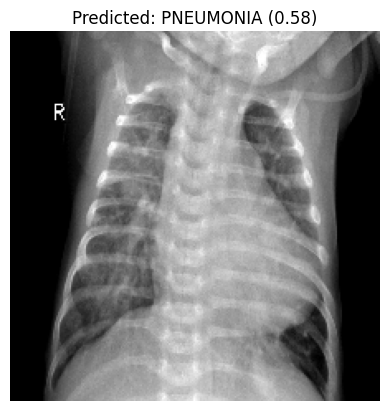

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


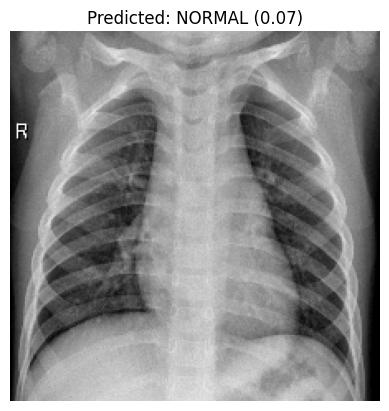

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


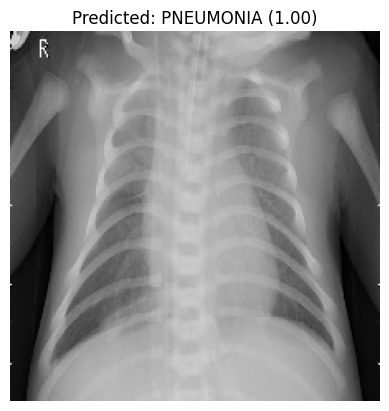

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


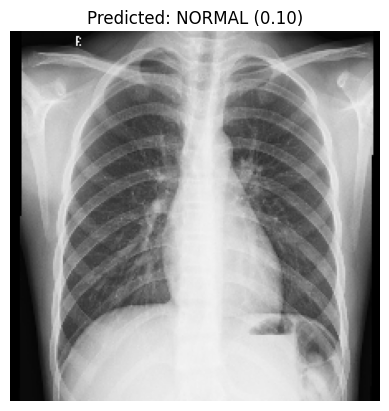

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


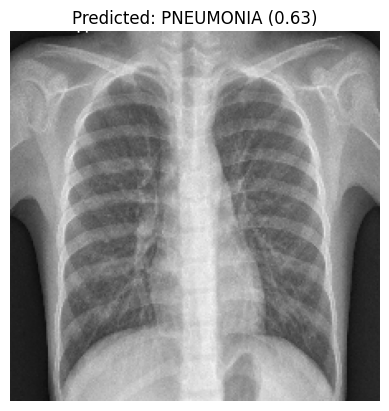

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


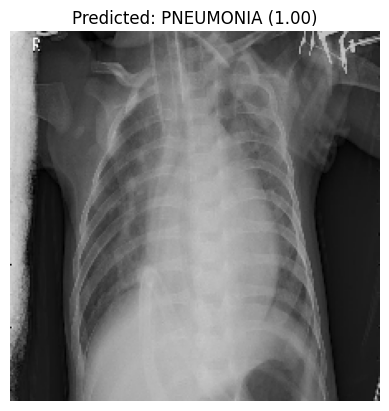

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


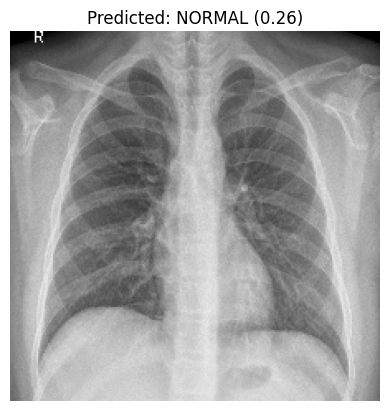

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


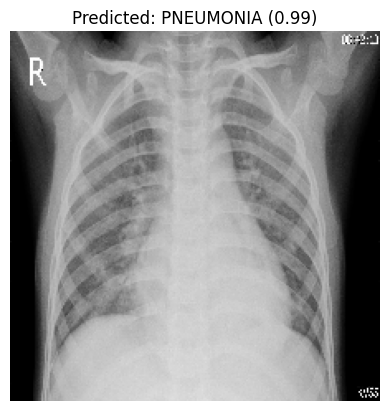

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


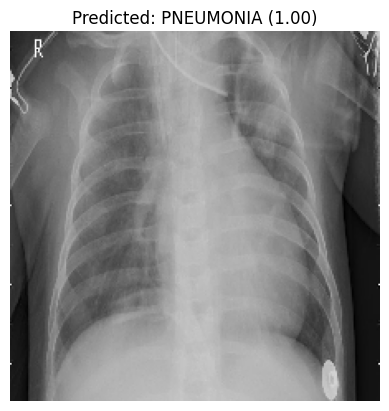

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


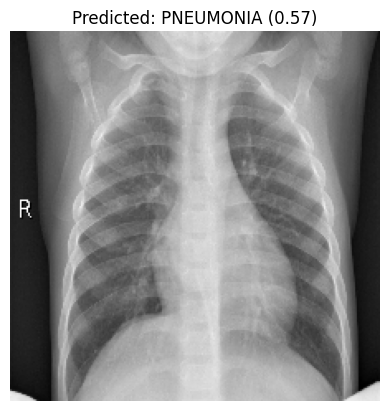

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

test_dir = "test"  # test rasmlari joylashgan papka

for img_name in os.listdir(test_dir)[:10]:  # faqat 10 tasini ko‘ramiz
    img_path = os.path.join(test_dir, img_name)
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "PNEUMONIA" if prediction > 0.5 else "NORMAL"

    plt.imshow(img)
    plt.title(f"Predicted: {label} ({prediction:.2f})")
    plt.axis("off")
    plt.show()

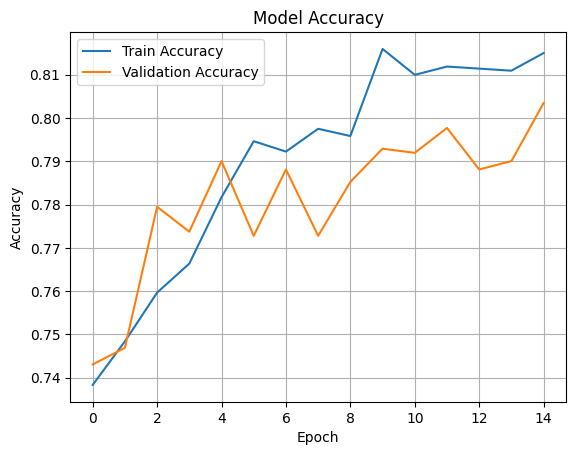

In [32]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()